In [1]:
import pandas as pd

In [2]:
banjir=pd.read_csv('./cleaned.csv',sep=';')
banjir.head()

banjir=banjir.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1)

banjir.head()

,WILAYAH,KECAMATAN,KELURAHAN,NO_RT,NO_RW,LUAS_AREA,GENANGAN,TINGGI,FLOOD,KETERANGAN,WAKTU,WAKTU_TEXT
0,JAKARTA TIMUR,MAKASAR,CIPINANG MELAYU,1,3,"0,00446061",40 cm,2,YES,NaN,2021-06-04 18:00:20,2021-06-04 18:00
1,JAKARTA TIMUR,MAKASAR,CIPINANG MELAYU,11,2,"0,00725819",40 cm,2,YES,NaN,2021-06-04 18:00:20,2021-06-04 18:00
2,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4,11,"0,02688579",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00
3,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,2,10,"0,04890982",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00
4,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,8,10,"0,03426088",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00


In [3]:
banjir[banjir['FLOOD']=='-']['KETERANGAN'].value_counts()

-                       975
Luapan Kali Cipinang      3
Name: KETERANGAN, dtype: int64

In [4]:
banjir[banjir['FLOOD']=='YES']['KETERANGAN'].value_counts()

Luapan Kali Ciliwung                                       621
CURAH HUJAN TINGGI                                         327
Curah Hujan Tinggi                                         203
-                                                          154
Luapan Kali Pesanggrahan                                   153
                                                          ... 
Pukul 00.00 WIB                                              1
LUAPAN KALI SEMONGOL DAN ROB                                 1
Penyebab: Curah Hujan Tinggi & Luapan Kali Pesanggrahan      1
Penyebab: Luapan Kali Angke                                  1
CURAH HUJAN TINGGI & LUAPAN KALI MAMPANG                     1
Name: KETERANGAN, Length: 79, dtype: int64

In [5]:
banjir['FLOOD']=banjir['FLOOD'].str.upper()
banjir

,WILAYAH,KECAMATAN,KELURAHAN,NO_RT,NO_RW,LUAS_AREA,GENANGAN,TINGGI,FLOOD,KETERANGAN,WAKTU,WAKTU_TEXT
0,JAKARTA TIMUR,MAKASAR,CIPINANG MELAYU,1,3,"0,00446061",40 cm,2,YES,NaN,2021-06-04 18:00:20,2021-06-04 18:00
1,JAKARTA TIMUR,MAKASAR,CIPINANG MELAYU,11,2,"0,00725819",40 cm,2,YES,NaN,2021-06-04 18:00:20,2021-06-04 18:00
2,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4,11,"0,02688579",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00
3,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,2,10,"0,04890982",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00
4,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,8,10,"0,03426088",40 cm,2,YES,NaN,2022-01-20 0:00:18,2022-01-20 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5994,JAKARTA TIMUR,KRAMAT JATI,CAWANG,9,5,"0,01365099",50.0,2,YES,NaN,2022-10-18 6:00:19,2022-10-18 06:00
5995,JAKARTA TIMUR,KRAMAT JATI,CAWANG,2,3,"0,00723049",50.0,2,YES,NaN,2022-10-18 6:00:19,2022-10-18 06:00
5996,JAKARTA TIMUR,KRAMAT JATI,CAWANG,15,3,"0,0055472",50.0,2,YES,NaN,2022-10-18 6:00:19,2022-10-18 06:00
5997,JAKARTA TIMUR,KRAMAT JATI,CAWANG,11,5,"0,01268629",50.0,2,YES,NaN,2022-10-18 6:00:19,2022-10-18 06:00


In [23]:
filtered_df = banjir[banjir['FLOOD'] == 'YES']

yes_counts = filtered_df.groupby('WILAYAH').size().reset_index(name='COUNT')

# Display the result
print(yes_counts)

           WILAYAH  COUNT
0    JAKARTA BARAT   1140
1    JAKARTA PUSAT     30
2  JAKARTA SELATAN   1621
3    JAKARTA TIMUR   1990
4    JAKARTA UTARA    123


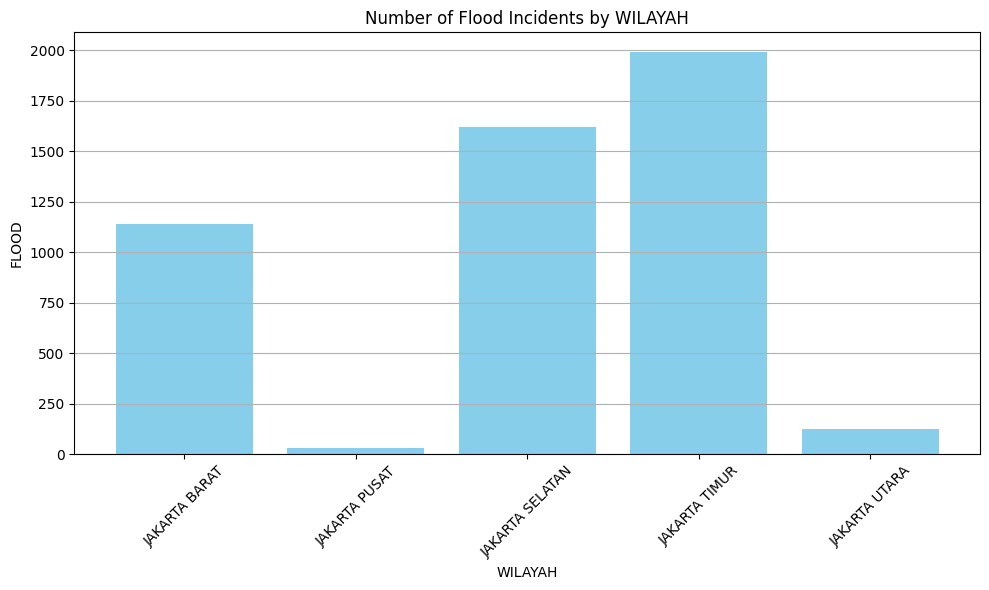

In [9]:
import matplotlib.pyplot as plt

# Assuming 'banjir' DataFrame is already loaded

# Filter the DataFrame to include only rows where 'FLOOD' is 'YES'
filtered_df = banjir[banjir['FLOOD'] == 'YES']

# Group by 'WILAYAH' and count the number of 'YES' in the 'FLOOD' column
yes_counts = filtered_df.groupby('WILAYAH').size().reset_index(name='COUNT')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(yes_counts['WILAYAH'], yes_counts['COUNT'], color='skyblue')

# Customize the chart
plt.title('Number of Flood Incidents by WILAYAH')
plt.xlabel('WILAYAH')
plt.ylabel('FLOOD')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [10]:
filtered_df = banjir[banjir['FLOOD'] == 'YES']

# Group by 'WILAYAH' and count the number of 'YES' in the 'FLOOD' column
kelurahan_count = filtered_df.groupby('KELURAHAN').size().reset_index(name='COUNT')

# Display the result
print(kelurahan_count)

        KELURAHAN  COUNT
0           ANCOL     50
1    BALE KAMBANG     31
2      BAMBU APUS      1
3          BANGKA     51
4            BARU      8
..            ...    ...
92    TEBET BARAT      2
93     TEGAL ALUR    309
94   TEGAL PARANG     76
95        ULUJAMI     26
96  WIJAYA KUSUMA      2

[97 rows x 2 columns]


In [11]:
top_10_kelurahan = kelurahan_count.sort_values(by='COUNT', ascending=False).head(10)

# Display the result
print(top_10_kelurahan)


           KELURAHAN  COUNT
37    KAMPUNG MELAYU    705
10            CAWANG    461
93        TEGAL ALUR    309
36             KAMAL    255
73         PETOGOGAN    244
23   CIPINANG MELAYU    242
78     PONDOK PINANG    241
7        BIDARA CINA    206
12  CENGKARENG BARAT    126
68      PELA MAMPANG    109


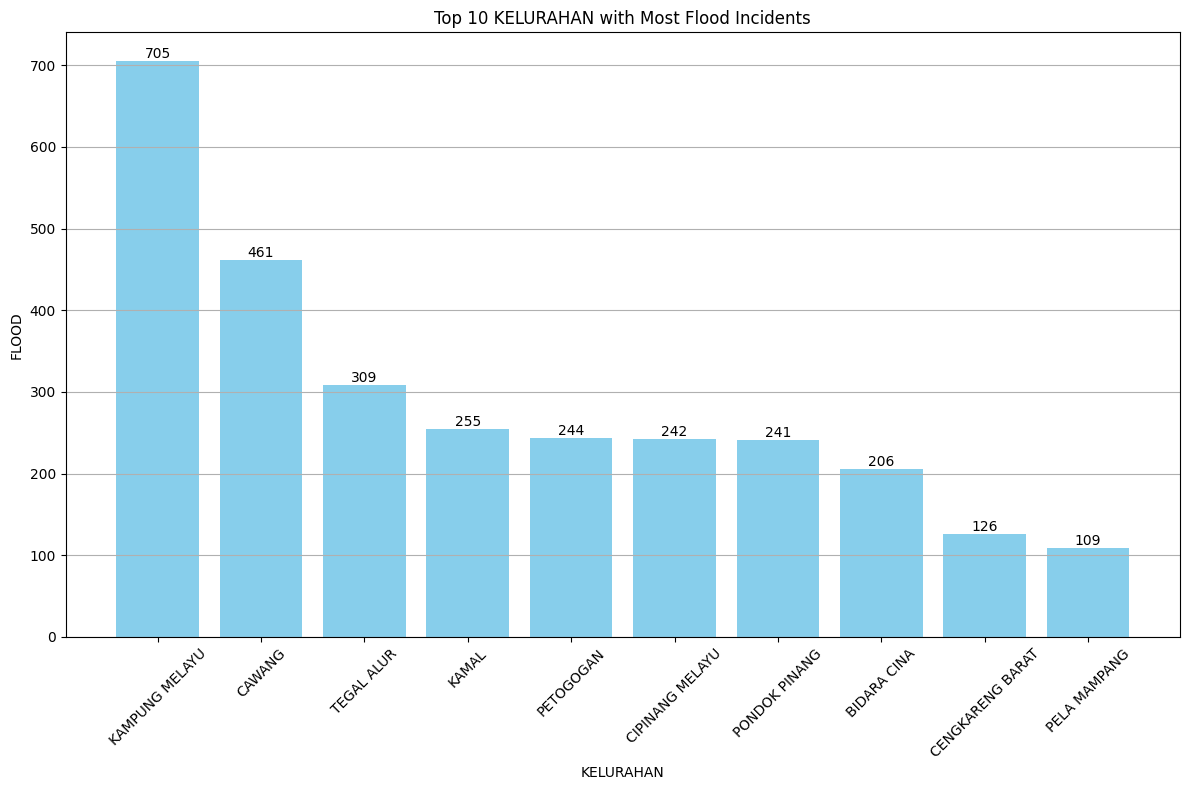

In [12]:
# Plot the bar chart for the top 10 'KELURAHAN'
plt.figure(figsize=(12, 8))
plt.bar(top_10_kelurahan['KELURAHAN'], top_10_kelurahan['COUNT'], color='skyblue')

# Customize the chart
plt.title('Top 10 KELURAHAN with Most Flood Incidents')
plt.xlabel('KELURAHAN')
plt.ylabel('FLOOD')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add data labels on top of the bars
for index, value in enumerate(top_10_kelurahan['COUNT']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
filtered_df = banjir[banjir['FLOOD'] == 'YES']

# Group by 'WILAYAH' and count the number of 'YES' in the 'FLOOD' column
kecamatan_count = filtered_df.groupby('KECAMATAN').size().reset_index(name='COUNT')

# Display the result
print(kecamatan_count)

top_kecamatan=kecamatan_count.sort_values(by='COUNT', ascending=False).head(10)

            KECAMATAN  COUNT
0              CAKUNG      7
1       CEMPAKA PUTIH      1
2          CENGKARENG    340
3            CILANDAK     40
4           CILINCING     46
5            CIPAYUNG     34
6             CIRACAS     36
7         DUREN SAWIT     21
8   GROGOL PETAMBURAN      2
9           JAGAKARSA     38
10         JATINEGARA    945
11         KALI DERES    577
12     KEBAYORAN BARU    271
13     KEBAYORAN LAMA    268
14        KEBON JERUK     98
15          KEMBANGAN    123
16        KRAMAT JATI    642
17            MAKASAR    270
18   MAMPANG PRAPATAN    267
19           MATRAMAN      4
20         PADEMANGAN     50
21           PANCORAN    148
22       PASAR MINGGU    321
23         PASAR REBO     31
24        PENJARINGAN     27
25       PESANGGRAHAN    212
26         SETIA BUDI      4
27        TANAH ABANG     29
28              TEBET     52


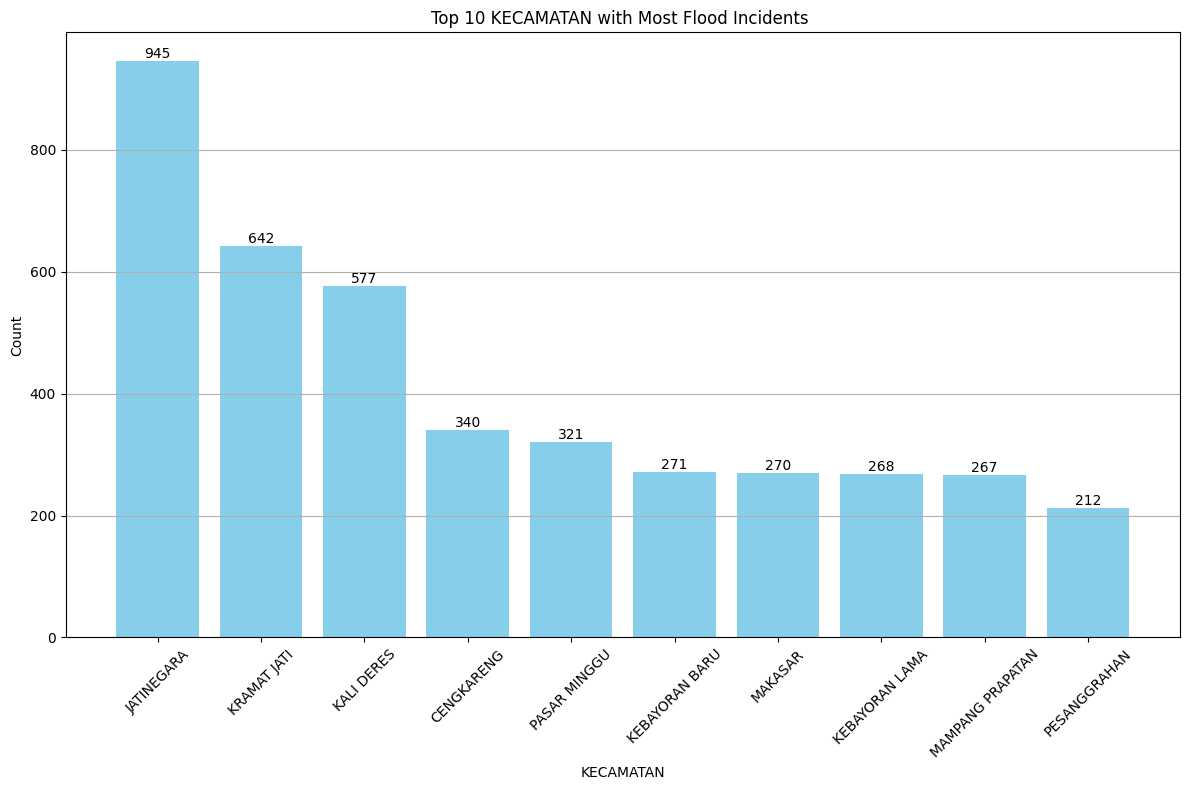

In [14]:
# Step 4: Plot the bar chart for the top 10 'KECAMATAN'
plt.figure(figsize=(12, 8))
plt.bar(top_kecamatan['KECAMATAN'], top_kecamatan['COUNT'], color='skyblue')

# Customize the chart
plt.title('Top 10 KECAMATAN with Most Flood Incidents ')
plt.xlabel('KECAMATAN')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add data labels on top of the bars
for index, value in enumerate(top_kecamatan['COUNT']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
filtered_df = banjir[banjir['FLOOD'] == 'YES']
alasan= filtered_df.groupby('KETERANGAN').size().reset_index(name='count_keterangan')

alasan.sort_values(by='count_keterangan', ascending=False).head(10)

,KETERANGAN,count_keterangan
41,Luapan Kali Ciliwung,621
3,CURAH HUJAN TINGGI,327
15,Curah Hujan Tinggi,217
0,-,185
52,Luapan Kali Pesanggrahan,153
84,luapan kali krukut,93
8,CURAH HUJAN TINGGI & LUAPAN KALI SUNTER,84
5,CURAH HUJAN TINGGI & LUAPAN KALI CILIWUNG,80
61,Penyebab : Luapan Kali Ciliwung,77
69,Penyebab: Curah Hujan Tinggi dan Luapan Kali K...,76


In [16]:
jakarta_utara_flood= banjir[(banjir['WILAYAH'] == 'JAKARTA UTARA') & (banjir['FLOOD'] == 'YES')]
jakarta_selatan_flood=banjir[(banjir['WILAYAH'] == 'JAKARTA SELATAN') & (banjir['FLOOD'] == 'YES')]
jakarta_barat_flood=banjir[(banjir['WILAYAH'] == 'JAKARTA BARAT') & (banjir['FLOOD'] == 'YES')]
jakarta_timur_flood=banjir[(banjir['WILAYAH'] == 'JAKARTA TIMUR') & (banjir['FLOOD'] == 'YES')]
jakarta_pusat_flood=banjir[(banjir['WILAYAH'] == 'JAKARTA PUSAT') & (banjir['FLOOD'] == 'YES')]

In [17]:
kecamatan_utara = jakarta_utara_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_selatan = jakarta_selatan_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_timur = jakarta_timur_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_barat = jakarta_barat_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')
kecamatan_pusat = jakarta_pusat_flood.groupby('KECAMATAN').size().reset_index(name='COUNT')

In [18]:
top_utara=kecamatan_utara.sort_values(by='COUNT',ascending=False).head(3)
top_selatan=kecamatan_selatan.sort_values(by='COUNT',ascending=False).head(3)
top_timur=kecamatan_timur.sort_values(by='COUNT',ascending=False).head(3)
top_barat=kecamatan_barat.sort_values(by='COUNT',ascending=False).head(3)
top_pusat=kecamatan_pusat.sort_values(by='COUNT',ascending=False).head(3)

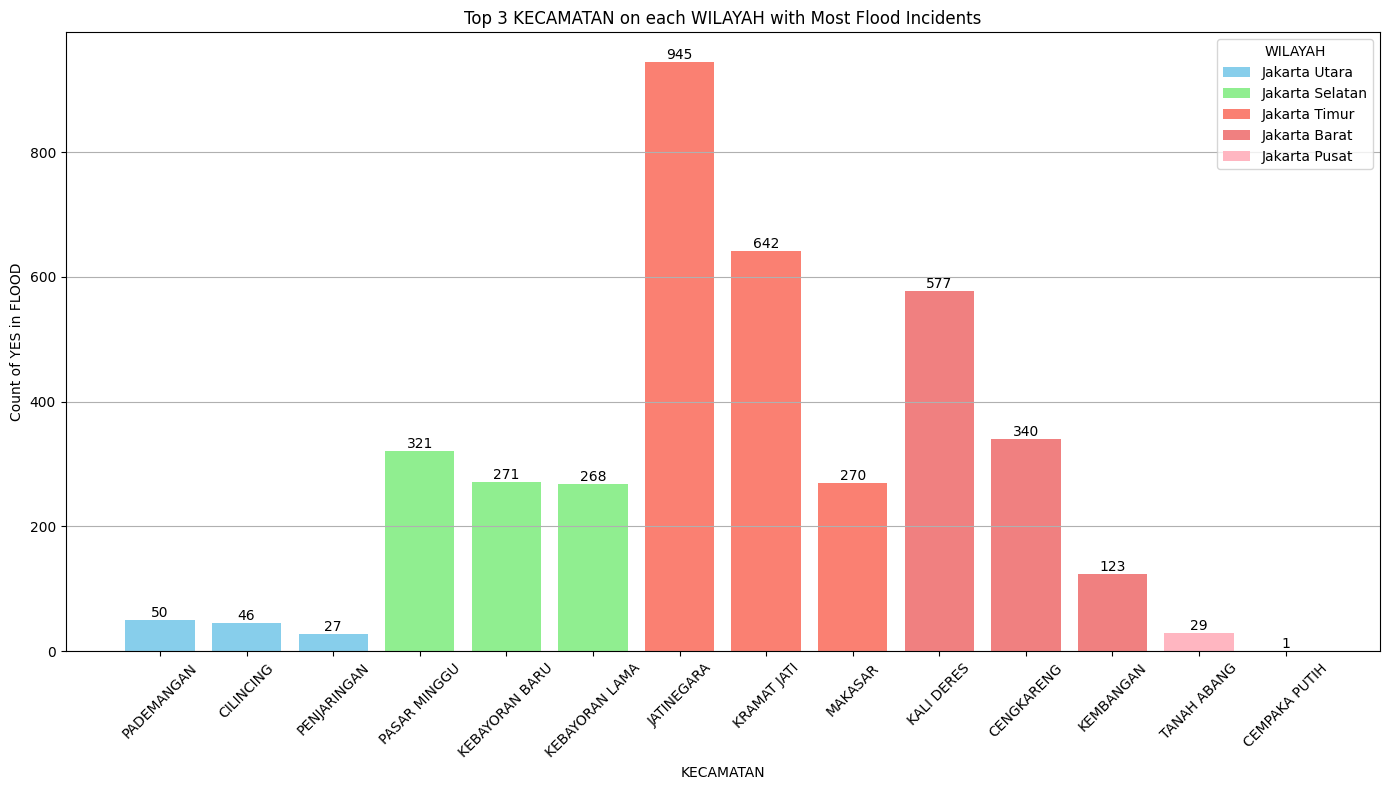

In [19]:

combined_top_kecamatan = pd.concat([top_utara, top_selatan, top_timur, top_barat, top_pusat])

wilayah_list = (['Jakarta Utara'] * len(top_utara) + 
                ['Jakarta Selatan'] * len(top_selatan) + 
                ['Jakarta Timur'] * len(top_timur) + 
                ['Jakarta Barat'] * len(top_barat) + 
                ['Jakarta Pusat'] * len(top_pusat))

combined_top_kecamatan['WILAYAH'] = wilayah_list

plt.figure(figsize=(14, 8))
colors = {'Jakarta Utara':'skyblue', 'Jakarta Selatan':'lightgreen', 'Jakarta Timur':'salmon', 'Jakarta Barat':'lightcoral', 'Jakarta Pusat':'lightpink'}
for wilayah in combined_top_kecamatan['WILAYAH'].unique():
    subset = combined_top_kecamatan[combined_top_kecamatan['WILAYAH'] == wilayah]
    plt.bar(subset['KECAMATAN'], subset['COUNT'], label=wilayah, color=colors[wilayah])


plt.title('Top 3 KECAMATAN on each WILAYAH with Most Flood Incidents')
plt.xlabel('KECAMATAN')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='WILAYAH')
plt.grid(axis='y')


for index, value in enumerate(combined_top_kecamatan['COUNT']):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.tight_layout()
plt.show()


In [20]:
keterangan_utara= jakarta_utara_flood.groupby('KETERANGAN').size().reset_index(name='count')
keterangan_selatan=jakarta_selatan_flood.groupby('KETERANGAN').size().reset_index(name='count')
keterangan_timur=jakarta_timur_flood.groupby('KETERANGAN').size().reset_index(name='count')
keterangan_barat= jakarta_barat_flood.groupby('KETERANGAN').size().reset_index(name='count')
keterangan_pusat=jakarta_pusat_flood.groupby('KETERANGAN').size().reset_index(name='count')

In [21]:
top_ket_utara=keterangan_utara.head(3)
top_ket_selatan=keterangan_selatan.head(3)
top_ket_timur=keterangan_timur.head(3)
top_ket_barat=keterangan_barat.head(3)
top_ket_pusat=keterangan_pusat.head(3)


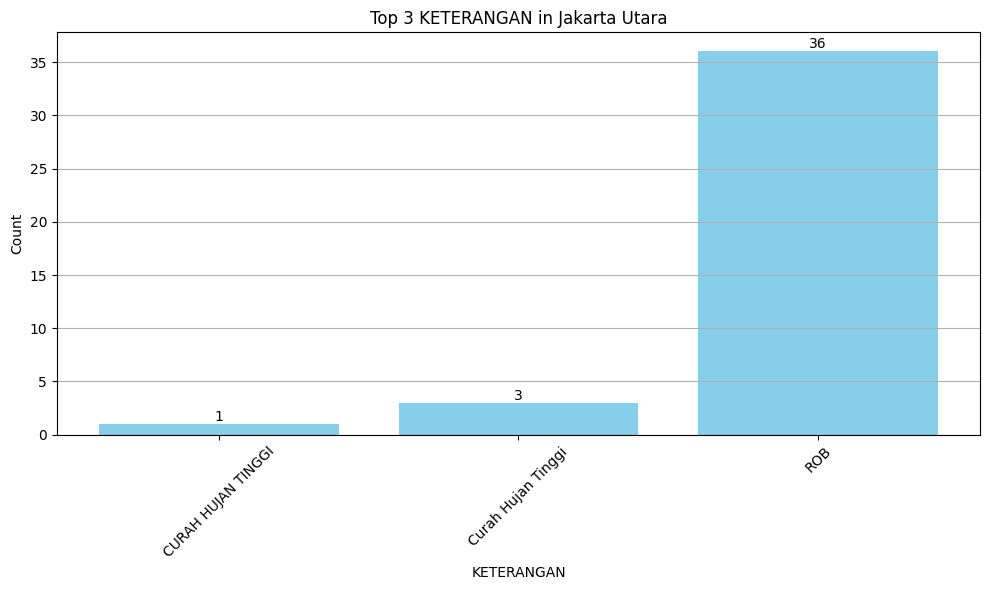

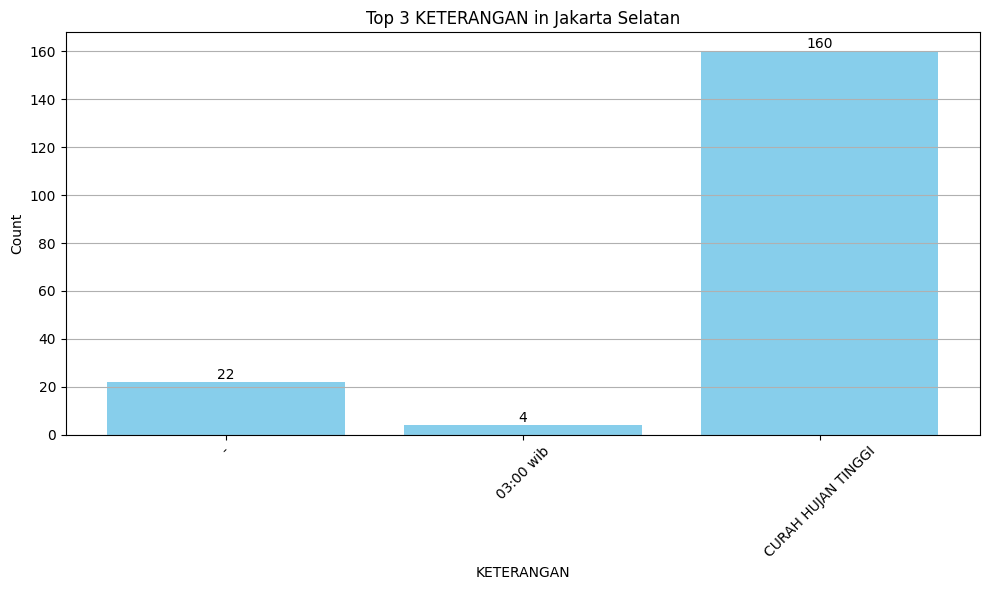

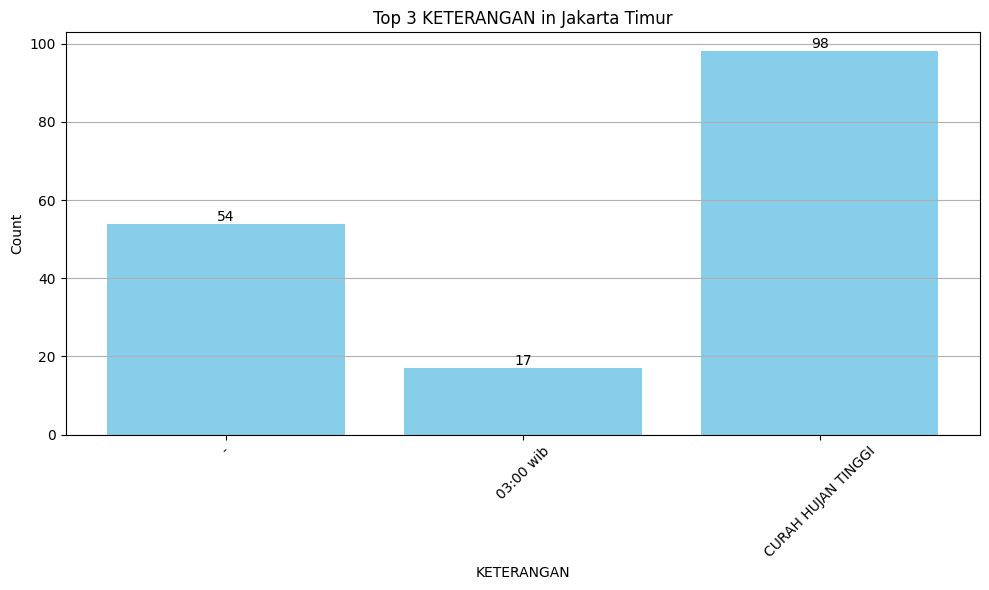

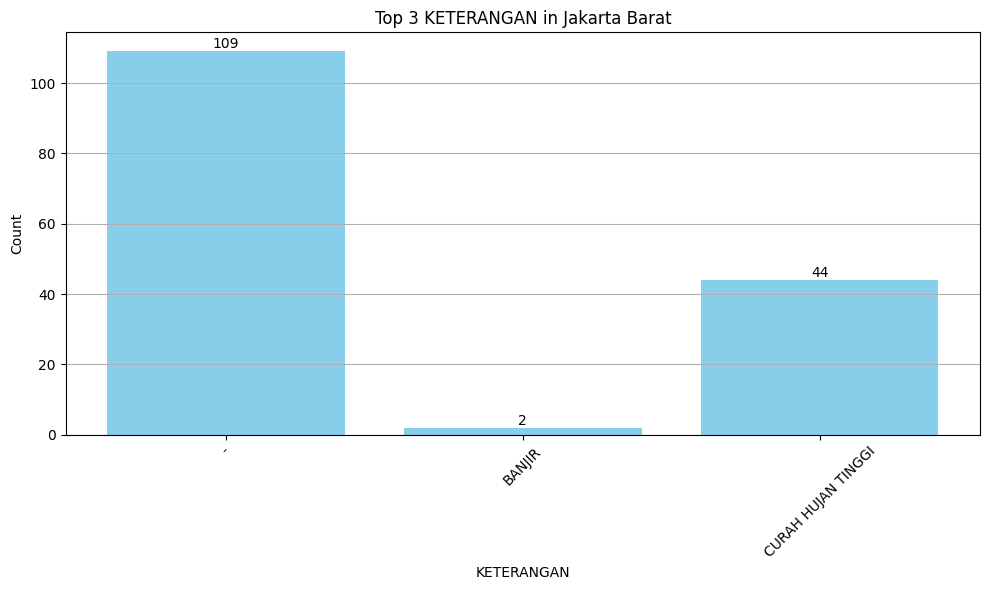

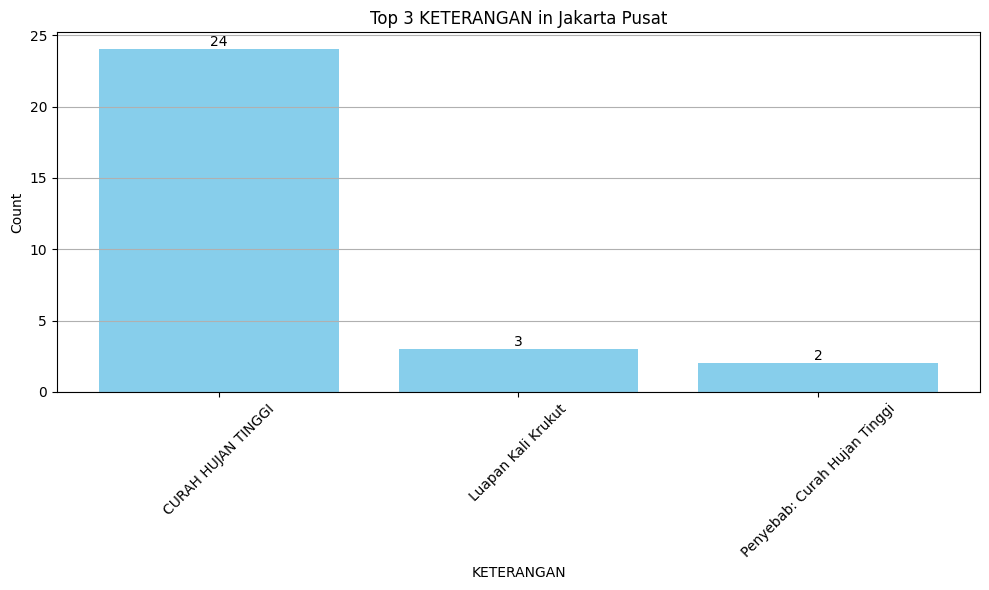

In [22]:

def plot_top_keterangan(top_keterangan, region_name):
    plt.figure(figsize=(10, 6))
    plt.bar(top_keterangan['KETERANGAN'], top_keterangan['count'], color='skyblue')
    

    plt.title(f'Top 3 KETERANGAN in {region_name}')
    plt.xlabel('KETERANGAN')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    

    for index, value in enumerate(top_keterangan['count']):
        plt.text(index, value, str(value), ha='center', va='bottom')
    

    plt.tight_layout()
    plt.show()

# Plot for Jakarta Utara
plot_top_keterangan(top_ket_utara, 'Jakarta Utara')

# Plot for Jakarta Selatan
plot_top_keterangan(top_ket_selatan, 'Jakarta Selatan')

# Plot for Jakarta Timur
plot_top_keterangan(top_ket_timur, 'Jakarta Timur')

# Plot for Jakarta Barat
plot_top_keterangan(top_ket_barat, 'Jakarta Barat')

# Plot for Jakarta Pusat
plot_top_keterangan(top_ket_pusat, 'Jakarta Pusat')